In [1]:
import torch
import random
import numpy as np
import pandas as pd
import torch.nn as nn
import matplotlib.pyplot as plt

from torch import Tensor
from typing import Type

### _Dataset_

In [2]:
def genRandNumber() -> None:
    return random.random() * 10.0

def straightLine(w: float, b: float, x_i: float) -> float:
    """
    w: slope
    b: intercept
    """
    return w * x_i + b

In [3]:
data = pd.DataFrame(
    {
        'x': [0, 1, 1, 2, 3, 4, 5],
        'y': [3, 2, 3, 5, 4, 4, 7],
    }
)
data

,x,y
0,0,3
1,1,2
2,1,3
3,2,5
4,3,4
5,4,4
6,5,7


In [4]:
X = data.iloc[:, 0].values
Y = data.iloc[:, 1].values 

In [5]:
def showData(data: pd.DataFrame, func: Type[straightLine] = None, w: float = 0., b: float = 0.) -> None:
    plt.figure(figsize=(5, 5))
    if func is not None:
        x = np.linspace(-1, 5, 100)
        y = func(w, b, x)
        plt.plot(x, y, '-r', label=f"y = {w}*x + {b}")
    plt.scatter(X, Y, s=50, color="blue")
    plt.title("Scatter plot")
    plt.show()

### _Scatter Plot_

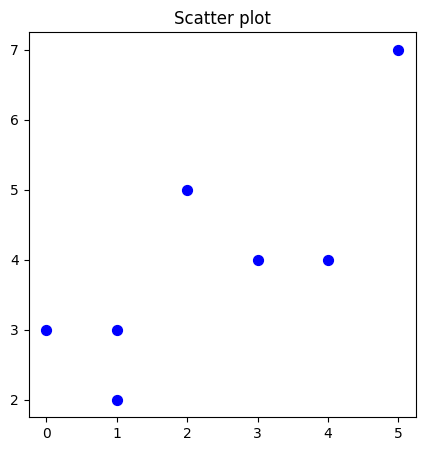

In [6]:
showData(data=data)

### _Linear Regression by Least Squares_


Slope: 0.7205882
Intercept: 2.3529412


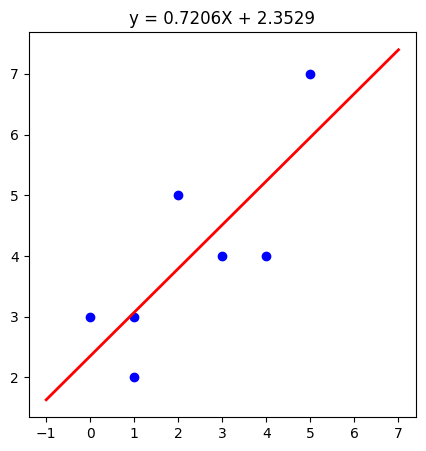

In [7]:
sum_X  = X.sum()
sum_Y  = Y.sum()
sum_XY = np.dot(X, Y)
sum_XX = np.dot(X, X)

N = X.shape[0]

a = ((N * sum_XY) - (sum_X * sum_Y)) / ((N * sum_XX) - (sum_X)**2)
b = (sum_Y - (a * sum_X)) / N

print(f"\nSlope: {a:.7f}")
print(f"Intercept: {b:.7f}")

plt.figure(figsize=(5, 5))
x = np.linspace(-1, 7, 100)
y = straightLine(a, b, x)
plt.scatter(X, Y, color="blue")
plt.plot(x, y, '-r', linewidth=2)
plt.title(f"y = {a:.4f}X + {b:.4f}")
plt.show()

### _Gradient Descent_

In [8]:
def meanSquaredError(X: np.array, Y: np.array, w: float, b: float) -> float:
    sum_ = 0.
    for i in range(X.shape[0]):
        y_hat = straightLine(w, b, X[i])
        error = Y[i] - y_hat
        sum_ += error**2
    return sum_ / X.shape[0]

def gradientDescent(X: np.array, Y: np.array, w: float, b: float, epochs: int, lr: float = 1e-1) -> tuple:
    """
    epochs: number of times that the gradient descent is executed
    lr: learning rate - regulates the step of the gradient
    """
    losses = []
    for epoch in range(epochs):
        sum_w = 0.0
        sum_b = 0.0
        for i in range(X.shape[0]):
            sum_w += -2 * (Y[i] - straightLine(w, b, X[i])) * X[i]
            sum_b += -2 * (Y[i] - straightLine(w, b, X[i]))
        deriv_w = sum_w / X.shape[0]
        deriv_b = sum_b / X.shape[0]
        w -= lr * deriv_w
        b -= lr * deriv_b
        loss = meanSquaredError(X, Y, w, b)
        losses.append(loss)
    return (losses, w, b)

### _Results_

In [9]:
def run(X: np.array, Y: np.array):
    _ = plt.figure(figsize=(20, 5))
    # Init parameters
    w = genRandNumber()
    b = genRandNumber()
    # Gradient Descent
    losses, new_w, new_b = gradientDescent(X, Y, w, b, 100)
    # Create Straight Line
    x = np.linspace(-1, 7, 100)
    y = straightLine(w, b, x)
    # Show results - Before
    plt.subplot(1, 3, 1)
    plt.scatter(X, Y, color="blue")
    plt.plot(x, y, '-r', linewidth=2)
    #sns.scatterplot(data=data, x='x', y='y')
    plt.title(f"y = {w:.1f}X + {b:.1f}")
    # Show results - After
    plt.subplot(1, 3, 2)
    plt.scatter(X, Y, color="blue")
    x = np.linspace(-1, 7, 100)
    y = straightLine(new_w, new_b, x)
    plt.plot(x, y, '-r', linewidth=2)
    #sns.scatterplot(data=data, x='x', y='y')
    plt.title(f"y = {new_b:.1f}X + {new_b:.1f}")
    # Show loss
    plt.subplot(1, 3, 3)
    plt.plot(losses, '-r', linewidth=2)
    plt.title("MSE Loss")
    plt.show()

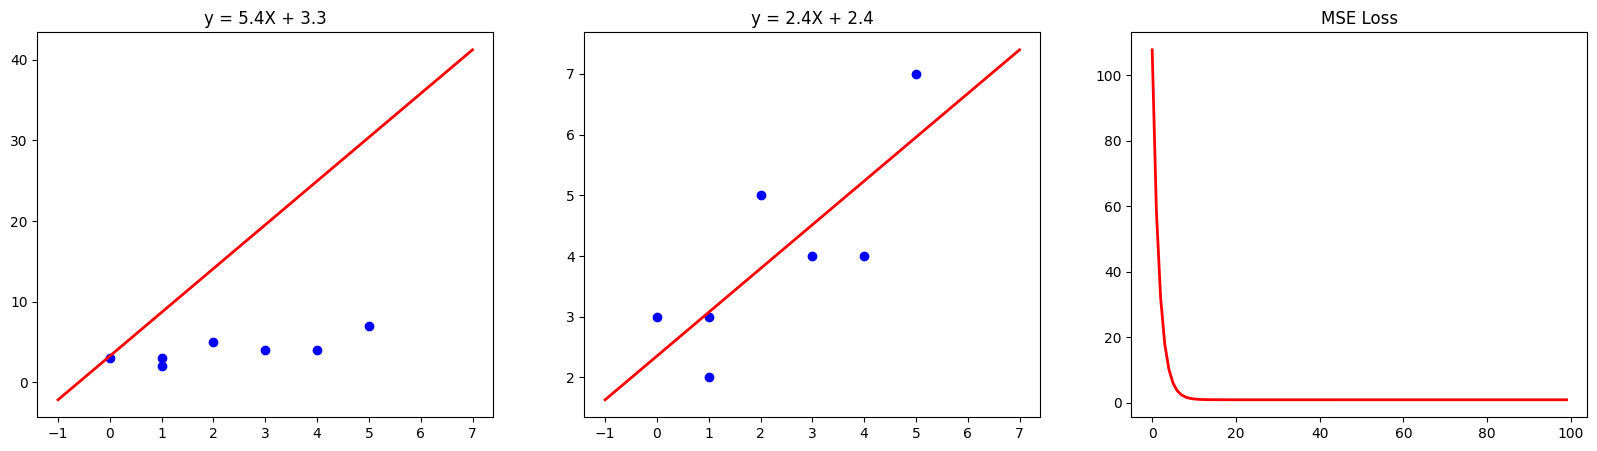

In [10]:
run(X, Y)

### _Neural Network_
`1 -> 10 -> 10 -> 1`

In [11]:
class NeuralNetwork(nn.Module):
    def __init__(self) -> None:
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(in_features=1, out_features=10)
        self.fc2 = nn.Linear(in_features=10, out_features=10)
        self.fc3 = nn.Linear(in_features=10, out_features=10)
        self.fc4 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
    
    def forward(self, X: Tensor) -> Tensor:
        X = self.relu(self.fc1(X))
        X = self.relu(self.fc2(X))
        X = self.relu(self.fc3(X))
        X = self.fc4(X)
        return X 

### _Hyperparameters, NN Model, Loss Function and Optimizer_

In [12]:
lr = 1e-1
epochs = 100

nn_model = NeuralNetwork()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(nn_model.parameters(), lr=lr)

### _Convert the data to Tensor and Training Loop_

In [13]:
X = torch.tensor(X.reshape(-1, 1), dtype=torch.float)
Y = torch.tensor(Y.reshape(-1, 1), dtype=torch.float)

losses_train = []
for epoch in range(epochs):
    nn_model.train()
    with torch.enable_grad():
        output_train = nn_model(X)
        loss_train = criterion(output_train, Y)
        losses_train.append(loss_train.item())
        loss_train.backward()
        optimizer.step()
        optimizer.zero_grad()


### _NN Results_

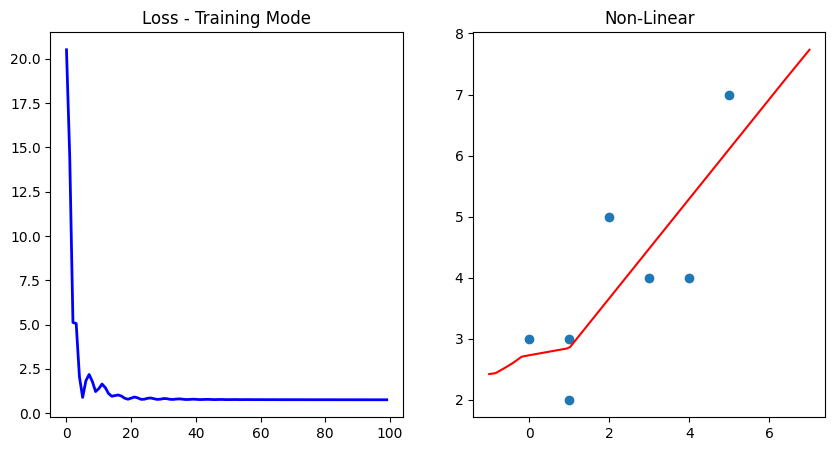

In [14]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(losses_train, linewidth=2, color="blue")
plt.title("Loss - Training Mode")
plt.subplot(1, 2, 2)
plt.scatter(X, Y)
x = torch.tensor(np.linspace(-1, 7, 100), dtype=torch.float).reshape(-1, 1)
nn_model.eval()
with torch.inference_mode():
    y = nn_model.forward(x)
x = x.detach().numpy()
y = y.detach().numpy()
plt.plot(x, y, '-r')
plt.title("Non-Linear")
plt.show() 